In [1]:
#used these notebooks as inspiration: https://moderndata.plot.ly/nba-player-movement-using-plotly-animations/
#https://plot.ly/python/animations/

import plotly.plotly as py
from plotly.grid_objs import Grid, Column
import plotly.graph_objs as go

import matplotlib.pyplot as plt
from scipy.misc import imread
import cufflinks as cf
import numpy as np
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

#function for removing duplicates and preserving order
def de_dup(seq): 
   check = []
   for i in seq:
       if i not in check: #verifies if i is in the new list, if not, appends it; if its duplicate then goes to the next one
           check.append(i)
   return check

In [2]:
calcium=pd.read_excel('vehicle.xlsx',index_col=0)

In [3]:
calcium.head()

,Mean(g_1),Mean(g_2),Mean(ng_1),Mean(ng_2),Mean(ng_3),Mean(ng_4),Mean(ng_5),Mean(g_3),Mean(g_4),Mean(g_5),...,Mean(ng_93),Mean(ng_94),Mean(ng_95),Mean(ng_96),Mean(ng_97),Mean(ng_98),Mean(ng_99),Mean(g_71),Mean(ng_100),Mean(g_72)
100,0.879027,0.849375,0.886865,0.915211,0.996854,0.989914,0.912896,0.972949,0.960312,0.922602,...,1.047347,0.906197,0.937778,0.908564,0.985996,0.829986,0.890700,1.020771,0.968833,0.897951
101,0.922927,0.834793,0.856021,0.897957,1.012928,1.002593,0.867924,0.983357,0.916028,0.876008,...,0.967896,0.932161,0.987155,0.892681,1.011840,0.845511,0.862459,0.956924,0.952371,0.910985
102,0.898363,0.861850,0.950522,1.005076,1.047679,0.923903,0.878436,0.941323,0.887605,1.011931,...,0.968081,0.882756,0.961627,0.863057,1.042200,0.867684,0.895779,0.994738,0.971846,0.892343
103,0.859919,0.811941,0.830737,0.916676,1.048294,0.885018,0.895557,0.987040,0.900790,0.939742,...,1.007194,0.917231,0.936665,0.812924,1.004409,0.809653,0.893256,0.902426,1.012887,0.830571
104,0.919702,0.811705,0.887428,0.839482,0.993230,0.986731,0.964774,0.990415,0.902601,0.966780,...,1.033279,0.928785,0.929564,0.920091,1.011727,0.867438,0.916364,0.975637,0.951256,0.860661


In [4]:
calcium.iplot(kind='scatter')#using cufflinks to plot graph ; too much data so it will be slow to generate

The draw time for this plot will be slow for clients without much RAM.


C:\Users\Deepu\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [6]:
calcium_time=pd.read_excel('vehicle.xlsx',index_col=0,sheetname=1)

In [7]:
calcium_time=calcium_time.fillna(0)

In [8]:
calcium_time=calcium_time.sort_values(0) #sort based on column 0 (first response)

In [9]:
calcium_time[0].iplot(kind='scatter')#using cufflinks to plot graph

In [10]:
#Read in the XY coordinates of the cells
xy_coord=pd.read_excel('XY coordinates_glia.xlsx',index_col=0)


In [11]:
xy_coord.head()

,Mean(g_1),Mean(g_2),Mean(ng_1),Mean(ng_2),Mean(ng_3),Mean(ng_4),Mean(ng_5),Mean(g_3),Mean(g_4),Mean(g_5),...,Mean(ng_93),Mean(ng_94),Mean(ng_95),Mean(ng_96),Mean(ng_97),Mean(ng_98),Mean(ng_99),Mean(g_71),Mean(ng_100),Mean(g_72)
X,210.181,221.715,245.244,266.798,270.941,254.259,239.645,234.963,223.461,251.781,...,87.219,67.260,81.551,88.840,39.859,134.877,121.381,127.703,98.566,85.412
Y,105.366,101.382,109.865,106.861,120.795,128.473,142.464,151.678,166.214,170.429,...,123.884,140.184,95.026,92.135,112.979,80.420,78.618,93.215,225.894,223.577


In [12]:
xy_coord.loc[:,xy_coord.columns.str.contains("ng_")]

,Mean(ng_1),Mean(ng_2),Mean(ng_3),Mean(ng_4),Mean(ng_5),Mean(ng_6),Mean(ng_7),Mean(ng_8),Mean(ng_9),Mean(ng_10),...,Mean(ng_91),Mean(ng_92),Mean(ng_93),Mean(ng_94),Mean(ng_95),Mean(ng_96),Mean(ng_97),Mean(ng_98),Mean(ng_99),Mean(ng_100)
X,245.244,266.798,270.941,254.259,239.645,277.328,296.125,283.550,285.188,275.956,...,62.579,88.611,87.219,67.260,81.551,88.840,39.859,134.877,121.381,98.566
Y,109.865,106.861,120.795,128.473,142.464,157.207,163.398,153.683,139.686,142.836,...,151.436,171.324,123.884,140.184,95.026,92.135,112.979,80.420,78.618,225.894


In [13]:
#Cleaning up the headings and grouping cells based on their heading; could also use this to differentiate cell types;
#While drawing ROIs, if you label the celltype as you go, makes the job much easier

xy_coord.columns=xy_coord.columns.str.replace("Mean\(g_",'y_GFAP_')
xy_coord.columns=xy_coord.columns.str.replace("\)",'')
xy_coord.columns=xy_coord.columns.str.replace("Mean\(ng_",'not_GFAP_')
xy_coord.columns=xy_coord.columns.str.replace("\)",'')
xy_coord.columns

Index(['y_GFAP_1', 'y_GFAP_2', 'not_GFAP_1', 'not_GFAP_2', 'not_GFAP_3',
       'not_GFAP_4', 'not_GFAP_5', 'y_GFAP_3', 'y_GFAP_4', 'y_GFAP_5',
       ...
       'not_GFAP_93', 'not_GFAP_94', 'not_GFAP_95', 'not_GFAP_96',
       'not_GFAP_97', 'not_GFAP_98', 'not_GFAP_99', 'y_GFAP_71',
       'not_GFAP_100', 'y_GFAP_72'],
      dtype='object', length=172)

In [14]:
#Getting the number of peaks for each trace; haven't used the peaks yet, but plan would be to colour cells based on no of peaks
peaks=calcium_time['No_of_peaks']
peaks 

Wave
not_GFAP_100    0
not_GFAP_69     0
not_GFAP_70     0
not_GFAP_18     0
not_GFAP_15     0
not_GFAP_99     0
not_GFAP_12     0
not_GFAP_11     0
not_GFAP_10     0
not_GFAP_9      0
not_GFAP_8      0
not_GFAP_7      0
not_GFAP_23     0
not_GFAP_6      0
not_GFAP_72     0
not_GFAP_3      0
not_GFAP_2      0
not_GFAP_1      0
y_GFAP_71       0
y_GFAP_70       0
y_GFAP_69       0
not_GFAP_62     0
not_GFAP_73     0
y_GFAP_62       0
not_GFAP_75     0
not_GFAP_5      0
y_GFAP_58       0
not_GFAP_24     0
not_GFAP_26     0
not_GFAP_57     0
               ..
not_GFAP_20     2
y_GFAP_30       3
not_GFAP_52     2
not_GFAP_56     7
not_GFAP_58     5
not_GFAP_46     2
y_GFAP_52       1
y_GFAP_38       4
y_GFAP_55       3
not_GFAP_63     5
y_GFAP_59       2
y_GFAP_41       3
not_GFAP_30     3
y_GFAP_10       2
y_GFAP_49       1
not_GFAP_59     1
not_GFAP_74     2
not_GFAP_97     2
y_GFAP_64       1
y_GFAP_27       2
y_GFAP_45       2
y_GFAP_60       2
not_GFAP_60     3
not_GFAP_87     1
y_GFA

In [15]:
#getting the x and y coordinates
column_name=list(xy_coord.columns)
xcoord=list(xy_coord[:].iloc[0])
ycoord=list(xy_coord[:].iloc[1])
len(ycoord)

172

In [16]:
#Generate dictionary to group cells with the same timing (peak onset timing, i.e., they respond at the same time)
from collections import OrderedDict

calcium_time_nonzero=calcium_time[0][calcium_time[0].astype(bool)] #get nonzero values
total_nonzero=len(calcium_time_nonzero)
duplicate_value=len(calcium_time_nonzero[calcium_time_nonzero.duplicated(keep='first')])
total_value=total_nonzero-duplicate_value

calcium_response={}


for i in range(total_value+1):
    calcium_response[i]={}

j=0
for i in range(len(calcium_time[0])):
    if(calcium_time[0][i]>0):
        if (i>0) and (calcium_time[0][i]==calcium_time[0][i-1]): #if time is greater than zero and if it equals previous time
            calcium_response[j][calcium_time.index[i]]=calcium_time[0][i]
        else: #if it does not equal previous time, increment key and add the value
            j+=1
            calcium_response[j][calcium_time.index[i]]=calcium_time[0][i]
    else:
        continue
del calcium_response[0]
calcium_response
#make the frames equal to no of keys of calcium_response

{1: {'not_GFAP_71': 4.5599999999999996,
  'y_GFAP_3': 4.5599999999999996,
  'y_GFAP_32': 4.5599999999999996,
  'y_GFAP_34': 4.5599999999999996},
 2: {'y_GFAP_72': 9.5600000000000005},
 3: {'y_GFAP_33': 10.56, 'y_GFAP_39': 10.56},
 4: {'y_GFAP_51': 11.56},
 5: {'y_GFAP_68': 15.56},
 6: {'not_GFAP_77': 16.559999999999999},
 7: {'not_GFAP_91': 17.559999999999999},
 8: {'y_GFAP_36': 18.559999999999999},
 9: {'not_GFAP_31': 19.559999999999999, 'y_GFAP_4': 19.559999999999999},
 10: {'y_GFAP_40': 20.559999999999999},
 11: {'not_GFAP_39': 21.559999999999999, 'not_GFAP_44': 21.559999999999999},
 12: {'not_GFAP_85': 22.559999999999999},
 13: {'y_GFAP_63': 23.559999999999999, 'y_GFAP_67': 23.559999999999999},
 14: {'not_GFAP_76': 24.559999999999999},
 15: {'not_GFAP_17': 25.559999999999999,
  'not_GFAP_55': 25.559999999999999,
  'not_GFAP_65': 25.559999999999999},
 16: {'not_GFAP_79': 26.559999999999999, 'y_GFAP_61': 26.559999999999999},
 17: {'not_GFAP_22': 27.559999999999999, 'y_GFAP_65': 27.55

In [17]:
columns=[] #make grids and xy coord based on the timings of the glia
columns_name=[] #make grids and names based on the timings of the glia
glia_name=[] #make grids to correspond with cell name

xcoord1=[]
ycoord1=[]
namescoord=[]
peaks_glia=[]#havent applied peak data in the graph yet
columns_peaks=[]

z=0 #counter for columns

#To generate graphs, you make grids using the functions Column and Grid
#Being an animation each column will represent the cells to be shown in each frame
for j,k in calcium_response.items():
    glia_num=len(k)
    #print(glia_num)
    glia_list=list(k.keys())
    #print(glia_list)
    glia_name.append(glia_list)
    #print(glia_name)
    for i in range(glia_num):
        if(glia_list[i]) in xy_coord.columns: #adding glia based on the response times
            xcoord1.append(xy_coord[glia_list[i]]['X'])
            ycoord1.append(xy_coord[glia_list[i]]['Y'])
            namescoord.append(glia_list[i])
            peaks_glia.append(peaks[glia_list[i]])
    z+=glia_num
    #create plotly grid for xy coordinates
    columns.append(Column(xcoord1[:z],'x{}'.format(j)))
    columns.append(Column(ycoord1[:z],'y{}'.format(j)))
    columns_name.append(Column(namescoord[:z],'name{}'.format(j)))
    columns_peaks.append(Column(peaks_glia[:z],'peak{}'.format(j)))
grid=Grid(columns)
grid1=Grid(columns_name)
grid2=Grid(columns_peaks)
py.grid_ops.upload(grid, 'Calcium_Vehicle_slider1')
py.grid_ops.upload(grid1, 'glia_name1')
py.grid_ops.upload(grid2,'peaks_glia1')

'https://plot.ly/~pradeepr/294/'

In [18]:
peaks[glia_list[0]]

1

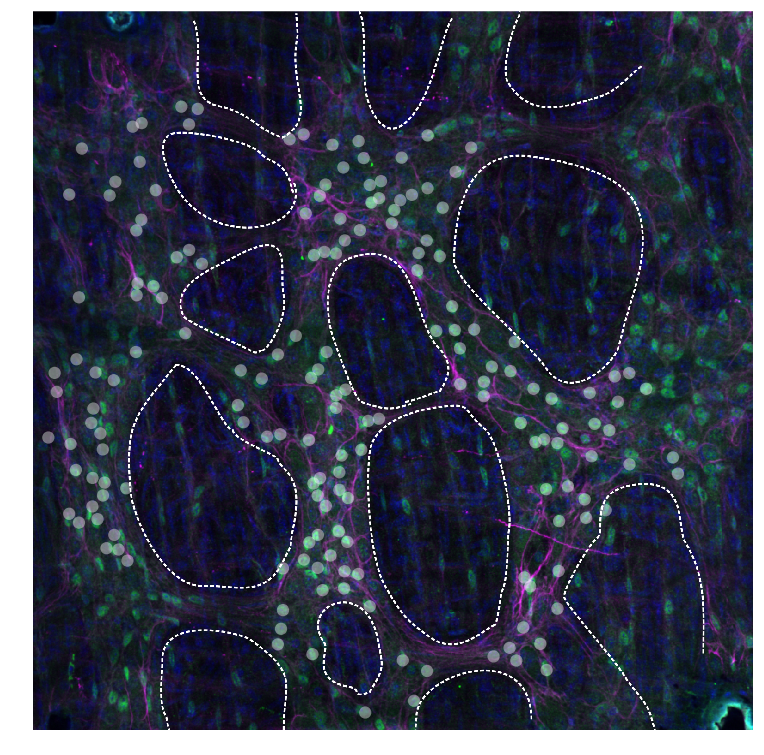

In [19]:
#create picture with a white circle over all green cells that are analysed.  
#The white dotted lines were done in Photoshop
img=imread('calcium_markers.tif')
fig= plt.figure(figsize=(10, 10),frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax) # https://stackoverflow.com/questions/8218608/scipy-savefig-without-frames-axes-only-content


plt.scatter(xcoord,ycoord,s=150,color='white',alpha=0.4,edgecolors='none') #facecolors='none' for transparent  and edgecolors='w' to specify edgecolor
plt.imshow(img,zorder=0,extent=[0, 590.48, 590.48, 0])
plt.xlim(0,590.48)
plt.ylim(590.48,0)
#plt.show()
#fig.patch.set_visible(False)

plt.savefig("22C_confocal_markers.png",dpi=200)
plt.show()
#uploaded this picture to github at https://raw.githubusercontent.com/pr4deepr/Images/master/22C_confocal_grid_markers.jpg which is used later


In [20]:
#defining axis of the plotly graph
axis=dict(ticklen=4,
          mirror=True,
          zeroline=False,
          showline=True,
          autorange=False,
          showgrid=False)

#This is used to generate labels for the axis
timepoints=de_dup(calcium_time[0]) #delete duplicate time points
del(timepoints[0]) #remove timepoints 0
timepoints=np.round(timepoints,2) #round them to two decimal places
timepoints

array([   4.56,    9.56,   10.56,   11.56,   15.56,   16.56,   17.56,
         18.56,   19.56,   20.56,   21.56,   22.56,   23.56,   24.56,
         25.56,   26.56,   27.56,   29.56,   30.56,   34.56,   36.56,
         37.56,   38.56,   39.56,   40.56,   41.56,   45.56,   46.56,
         47.56,   48.56,   50.56,   52.56,   53.56,   54.56,   56.56,
         60.56,   62.56,   64.56,   66.56,   69.56,   71.56,   75.56,
         79.56,   80.56,   82.56,   88.56,   90.56,   97.56,   98.56,
        101.56,  107.56,  117.56,  120.56,  129.56,  145.56,  156.56,
        162.56,  167.56])

In [21]:
#for the images, when referring to pixels, x axis starts at bottom left and Y axis at top left
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

#Defining the layout of the graph
#When defining source of the image, need to give a URL; using a directory location didn't work

layout = {'title':'Calcium Vehicle',
              'hovermode':'closest',
              'images':[{'visible':True,
                           'source':"https://raw.githubusercontent.com/pr4deepr/Images/master/22C_confocal_grid_markers.jpg",
                           'sizex':590.48,
                           'sizey':590.48,
                           'xref':"x",
                           'yref':"y",
                           'x':0,
                           'y':0,
                           'sizing':"stretch",
                           'opacity':1,
                           'layer':'below'
                            }],
              'font':{'family':'Balto'},
              'showlegend':True,
              'autosize':False,
              'width':800,
              'height':800,
              'xaxis':dict(axis, **{'range': [0,590.48],'showticklabels': False,'showgrid': False}), 
              'yaxis':dict(axis, **{'range':[590.48,0],'showticklabels': False,'showgrid': False}), #the image size is 590.48x590.48 microns
              'updatemenus':[{'type':'buttons',
                                'direction':'left',
                                'showactive':False,
                                'y':-0.1,
                                'x':0.1,
                                'xanchor':'right',
                                'yanchor':'top',
                                'pad':{'t':0, 'r':10},
                                'buttons':[{'label':'Play',
                                              'method':'animate',
                                              'args':[None, {'frame':{'duration':300, 'redraw':False}, 
                                                               'transition':{'duration':300,'easing':'quadratic-in-out'},
                                                               'fromcurrent':True,
                                                               'mode':'immediate'}]}]
                             }]
         }


figure['layout']=layout

In [22]:
grid_frames=[]

z=0

for j,k in calcium_response.items():
    glia_list=list(k.keys())
    glia_num=len(k)
    z+=glia_num
    frame_data=[] #reset frame_data every loop

    frame_data.append({
        'xsrc': grid.get_column_reference('x{}'.format(j)),
        'ysrc': grid.get_column_reference('y{}'.format(j)),
        'textsrc': grid1.get_column_reference('name{}'.format(j)),
        'mode': 'markers',
        'marker':{'color': 'red'},
        'name': 'Responsive Glia'
    })
    grid_frames.append(frame_data) #need to run every loop, so that list of frames will be generated

    
figure['data']=grid_frames[0]

In [23]:

#Define the positioning and properties of the slider
sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Time:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 150, 'easing': 'cubic-in-out'},
    'pad': {'t': 50}, #spacing from the top
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

frames_grid=grid_frames
i=0

for j in timepoints:
    figure['frames'].append({'data': frames_grid[i], 'name': j}) #name should match the args [j] below or it won't work
    slider_step = {'args': [[j],   #Linking the step to the frame above and defining its properties
        {'frame': {'duration': 100, 'redraw': False},
         'mode': 'immediate','fromcurrent':True,
       'transition': {'duration':0}}],
     'label': j,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step) #Each step of the slider
    i+=1

figure['layout']['sliders'] = [sliders_dict]


In [24]:
py.icreate_animations(figure, "EGC_Vehicle_Slider1")